# Descrição

Esse script tem o objetivo de usar o selenium para pegar aquela tabela de resultados no site 'Fundamentus', veja abaixo:
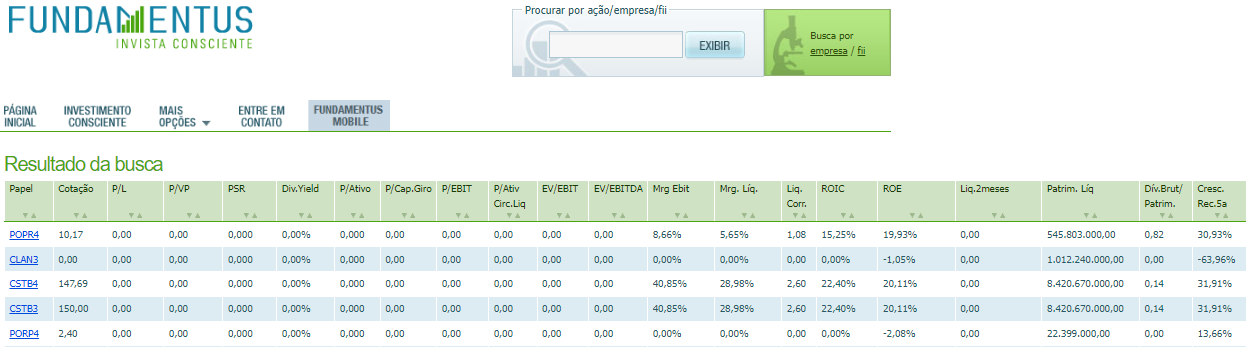
Então, pegamos o arquivo .txt com as opções de ações brasileiras e depois filtramos a tabela com essas opções.
Nesse código também faço a checagem se alguma opção não está presente na tabela geral do site. Vai ser útil para dar uma ideia sobre dados fundamentalistas.

# Biblotecas

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

# Entradas

In [2]:
acoesBrTreinee = pd.read_csv('AT_BR.txt')

acoesBrTreinee['AT_BR'] = acoesBrTreinee['AT_BR'].str.replace('.SA', '')

filtrarIndicadores = acoesBrTreinee['AT_BR'].values

# Automação

In [3]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

url = 'https://www.fundamentus.com.br/resultado.php'

driver.get(url)

local_tabela = '/html/body/div[1]/div[2]/table'

elemento = driver.find_element("xpath", local_tabela)

html_tabela = elemento.get_attribute('outerHTML')

tabelaFundamentus = pd.read_html(str(html_tabela), thousands = '.', decimal = ',')[0]

C:\Users\RENAN\AppData\Local\Temp\ipykernel_1840\863914393.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tabelaFundamentus = pd.read_html(str(html_tabela), thousands = '.', decimal = ',')[0]


In [6]:
tabelaFundamentus.columns = ['Ticker', 'Cotacao', 'P/L', 'P/VP', 'Price_to_Sale_Ratio', 'Dividend Yield (%)',
                             'P/Ativo', 'P/Capital_de_Giro', 'P/EBIT', 'P/Ativo_Circulante_Liquido',
                             'EV/EBIT', 'EV/EBITDA', 'Margem_EBIT (%)', 'Margem_Liquida (%)', 'Liquidez_Corrente',
                             'ROIC (%)', 'ROE (%)', 'Liquidez_2meses', 'Patrimonio_Liquido', 'DividaBruta/Patrimonio',
                             'Cresc. Rec.5a (%)']

# Validar e Exportar

In [7]:
qtdeAcoesTreinee = len(filtrarIndicadores)

print('Na dinâmica temos {} ações ou ETF\'s brasileiras compráveis.'.format(qtdeAcoesTreinee))

Na dinâmica temos 56 ações ou ETF's brasileiras compráveis.


In [8]:
tabelaFundamentus = tabelaFundamentus[tabelaFundamentus['Ticker'].isin(filtrarIndicadores)]

qtde_acoes_fundamentus = tabelaFundamentus.shape[0]

print('Se filtrarmos as ações da tabela do Fundamentus com as ações, pecebemos que há {} ações contempladas.'.format(qtde_acoes_fundamentus))
print('Assim, percebo que faltam {} Tickers que não encontro dados pela raspagem de dados.'.format(qtdeAcoesTreinee - qtde_acoes_fundamentus))

Se filtrarmos as ações da tabela do Fundamentus com as ações, pecebemos que há 48 ações contempladas.
Assim, percebo que faltam 8 Tickers que não encontro dados pela raspagem de dados.


In [9]:
acoesEncontradas = list(tabelaFundamentus['Ticker'].values)

acoesPerdidas = []

for acaoFiltrada in filtrarIndicadores:
    if acaoFiltrada in acoesEncontradas:
        pass
    else:
        acoesPerdidas.append(acaoFiltrada)

acoesPerdidas =  str(acoesPerdidas).replace('[','').replace(']','')

print('De todos os dados da tabela do Fundamentus, as seguintes empresas não tem dados: {}.'.format(acoesPerdidas))
print('Assim, devemos buscar essas individualente caso adotemos a escolha para compor a carteira.')
print('Uma observação pertinente é que esse código é uma automação para caso a gente tenha que olhar os indicadores fundamentalistas das nossas opções.')
print('Inclusive, isso tudo é só para ter uma ideia, porque os dados podem estar desatualizados.')

De todos os dados da tabela do Fundamentus, as seguintes empresas não tem dados: 'AGRI11', 'B5P211', 'BCSA34', 'IB5M11', 'IMAB11', 'IRFM11', 'MELI34', 'ROXO34'.
Assim, devemos buscar essas individualente caso adotemos a escolha para compor a carteira.
Uma observação pertinente é que esse código é uma automação para caso a gente tenha que olhar os indicadores fundamentalistas das nossas opções.
Inclusive, isso tudo é só para ter uma ideia, porque os dados podem estar desatualizados.


In [10]:
tabelaFundamentus.to_excel('DadosFundamentus.xlsx', index=False)